In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import itertools 

import time

import networkx as nx
from networkx.algorithms import approximation as apx

# import landscape as ld
import steiner_utils as su

In [3]:
def get_pos(g):
    '''returns dictionary with nodes physical location'''
    return dict( (n, n) for n in g.nodes() )

# Compute timing
Points selected at random. 

In [4]:
L0 = 10; Nterm = 10
terminals_2 = su.make_random_terminals(box_size = L0, Nterminals = Nterm)
G_2 = su.create_graph(box_size = L0, terminals = terminals_2)
su.graph_info(G_2, verbosity = False)

(1, 81, 144, 9)

In [5]:
tic = time.time()
steiner_2 = su.naive_steiner(G_2)

toc = time.time()
print('Calculation took {} sec'.format(toc-tic))
print('Length of Steiner tree {}'.format(len(steiner_2)))  

Calculation took 0.02783799171447754 sec
Length of Steiner tree 22


In [6]:
def time_steiner(L0, Nterm):
    terminals = su.make_random_terminals(box_size = L0, Nterminals = Nterm)
    G = su.create_graph(box_size = L0, terminals = terminals)
    
    info = su.graph_info(G, verbosity = False)
    
    tic = time.time()
    steiner = su.naive_steiner(G)

    toc = time.time()
    
    return (info, (toc-tic))

## Vary L0

In [7]:
varyL0 = [time_steiner(L0, 20) for L0 in range(10,41,2)]

In [8]:
varyL0

[((1, 81, 144, 20), 0.07140612602233887),
 ((1, 121, 220, 19), 0.05689716339111328),
 ((1, 169, 312, 18), 0.11020231246948242),
 ((1, 225, 420, 19), 0.2384488582611084),
 ((1, 289, 544, 19), 0.37606382369995117),
 ((1, 361, 684, 18), 0.6032278537750244),
 ((1, 441, 840, 19), 0.9910483360290527),
 ((1, 529, 1012, 20), 1.5961098670959473),
 ((1, 625, 1200, 20), 2.2409067153930664),
 ((1, 729, 1404, 19), 3.0445804595947266),
 ((1, 841, 1624, 20), 4.241245985031128),
 ((1, 961, 1860, 20), 6.304769039154053),
 ((1, 1089, 2112, 20), 7.103960990905762),
 ((1, 1225, 2380, 20), 10.350186109542847),
 ((1, 1369, 2664, 20), 11.944117069244385),
 ((1, 1521, 2964, 20), 15.962908029556274)]

In [9]:
X, Y = [x[-2] for x,y in varyL0], [y for x,y in varyL0]

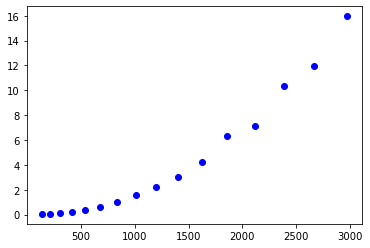

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line = ax.plot(X, Y, 'o', color='blue')

## vary Nterm

In [11]:
varyNterm = [(Nterm, time_steiner(30, Nterm)) for Nterm in range(10,61,4)]

In [12]:
X, Y = [x for x,y in varyNterm], [y[-1] for x,y in varyNterm]

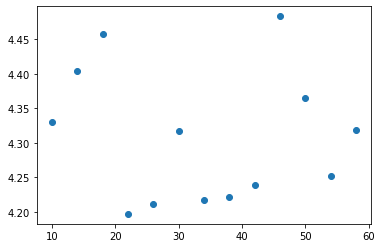

In [13]:
plt.plot(X,Y,'o')

# Shortest path

In [14]:
L0 = 40; Nterm = 2
terminals_3 = su.make_random_terminals(box_size = L0, Nterminals = Nterm)
G_3 = su.create_graph(box_size = L0, terminals = terminals_3)
su.graph_info(G_3, verbosity = False)

(1, 1521, 2964, 2)

In [15]:
def time_shortest_path(L0):
    
    terminals = su.make_random_terminals(box_size = L0, Nterminals = 2)
    G = su.create_graph(box_size = L0, terminals = terminals)
    info = su.graph_info(G, verbosity = False)
    
    s, t = terminals
    
    tic = time.time()
    nx.algorithms.shortest_path(G, source = s, target = t)
    toc = time.time()
    
    return (info, (toc-tic))

In [16]:
allY = []
for i in range(30):
    TimingsShortestPath = [time_shortest_path(L0) for L0 in range(10,61,2)]
    X = [x[2] for x,y in TimingsShortestPath]
    Y = np.array([y for x,y in TimingsShortestPath])
    allY.append(Y)

In [17]:
meanY = np.mean(allY, axis= 0)

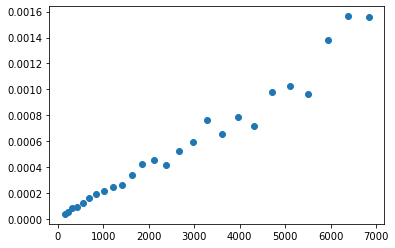

In [18]:
plt.plot(X,meanY,'o');

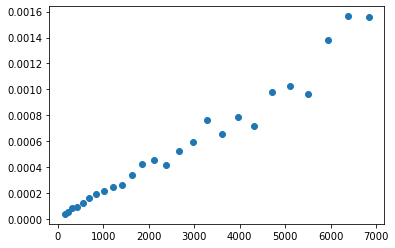

In [19]:
plt.plot(X,meanY,'o');